# Page Rank

In [1]:
import numpy as np
from scipy.sparse import dok_matrix
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
def SparseMatMult(G, x):
    '''
      y = SparseMatMult(G, x)
      
      Multiplies a vector (x) by a sparse matrix G,
      such that y = G @ x .
      
      Inputs:
        G is an NxM dictionary-of-keys (dok) sparse matrix
        x is an M-vector
      
      Output:
        y is an N-vector
    '''
    rows, cols = G.nonzero()
    y = np.zeros(np.shape(G)[0])

    for i, j in zip(rows, cols):
        y[i] += G[i, j] * x[j]

    return y

## Page Rank Implementation

In [3]:
def PageRank(G, alpha):
    '''
     p, iters = PageRank(G, alpha)

     Computes the Google Page-rank for the network in the adjacency matrix G.

     Input
       G     is an RxR adjacency matrix, G[i,j] = 1 iff node j projects to node i
             Note: G must be a dictionary-of-keys (dok) sparse matrix
       alpha is a scalar between 0 and 1

     Output
       p     is a probability vector containing the Page-rank of each node
       iters is the number of iterations used to achieve a change tolerance
             of 1e-8 (changes to elements of p are all smaller than 1e-8)
    '''
    rows, cols = G.nonzero()
    
    # Sum each column up and put sum in an array
    # column_totals[j] is the sum of the jth column in G
    column_totals = G.sum(axis=0).A1

    # R is number of nodes in the network
    R = np.shape(G)[0]
    
    # Initialize empty R x R sparse matrix for transition probability
    P = dok_matrix((R, R))
    
    # Generate the transition probability matrix
    for i, j in zip(rows,cols):
        P[i, j] = G[i, j] / column_totals[j]
    
    # Initialize p with uniform probability
    p = np.ones(R) / R
    
    iterations = 0
    d = np.zeros(R)
    
    # Fill in d vector
    for i in range(R):
        if i not in cols:
            d[i] = 1
    
    # Compute factor
    factor = alpha / R * np.ones(R)
    
    # Compute constant vector
    constant = (1 - alpha) / R * np.ones(R)
    
    while True:
        iterations += 1
        previous = p
        
        # Compute our new p
        p = alpha * SparseMatMult(P, p) + d @ p * factor + constant

        # If p converges then break
        if (abs(p - previous) <= 10e-8).all():
            break
    
    return p, iterations

## Demo Network

In [4]:
# Define our connections as a map so it's easier to input
# Later we transform this map to a sparse matrix to represent the network
# The key (x, y) means xy is an arc
# The value is the weight of the arc
connections = {
    ('A', 'B'): 0.38,
    ('A', 'C'): 0.38,
    ('A', 'E'): 0.24,
    ('B', 'A'): 0.06,
    ('B', 'C'): 0.41,
    ('B', 'F'): 0.53,
    ('C', 'A'): 0.47,
    ('C', 'B'): 0.29,
    ('C', 'D'): 0.24,
    ('D', 'C'): 0.08,
    ('D', 'E'): 0.42,
    ('D', 'F'): 0.50,
    ('E', 'A'): 0.09,
    ('E', 'D'): 0.04,
    ('E', 'F'): 0.09,
    ('E', 'G'): 0.39,
    ('E', 'L'): 0.39,
    ('F', 'B'): 0.09,
    ('F', 'D'): 0.28,
    ('F', 'E'): 0.19,
    ('F', 'L'): 0.22,
    ('F', 'H'): 0.22,
    ('G', 'E'): 0.13,
    ('G', 'L'): 0.20,
    ('G', 'H'): 0.17,
    ('G', 'J'): 0.27,
    ('G', 'I'): 0.23,
    ('H', 'F'): 0.15,
    ('H', 'L'): 0.15,
    ('H', 'G'): 0.21,
    ('H', 'I'): 0.21,
    ('H', 'K'): 0.18,
    ('H', 'J'): 0.10,
    ('I', 'G'): 0.24,
    ('I', 'H'): 0.24,
    ('I', 'J'): 0.32,
    ('I', 'K'): 0.20,
    ('J', 'H'): 0.40,
    ('J', 'G'): 0.30,
    ('J', 'I'): 0.05,
    ('J', 'K'): 0.25,
    ('K', 'I'): 0.07,
    ('K', 'H'): 0.33,
    ('K', 'J'): 0.60,
    ('L', 'F'): 0.18,
    ('L', 'E'): 0.06,
    ('L', 'G'): 0.47,
    ('L', 'H'): 0.29
}

# Map each node name to a unique index
mapping = {
    name: index for index, name in enumerate(sorted(set(
        key[0] for key in connections.keys()
    )))
}

# Get the total number of nodes in the network
nodes = len(mapping)

# Create empty sparse matrix
network = dok_matrix((nodes, nodes))

# Fill sparse matrix
for connection, weight in connections.items():
    a, b = connection
    network[mapping[b], mapping[a]] = weight

# See our sparse matrix
# For visualization purposes only
print(network.todense())

network

[[0.   0.06 0.47 0.   0.09 0.   0.   0.   0.   0.   0.   0.  ]
 [0.38 0.   0.29 0.   0.   0.09 0.   0.   0.   0.   0.   0.  ]
 [0.38 0.41 0.   0.08 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.24 0.   0.04 0.28 0.   0.   0.   0.   0.   0.  ]
 [0.24 0.   0.   0.42 0.   0.19 0.13 0.   0.   0.   0.   0.06]
 [0.   0.53 0.   0.5  0.09 0.   0.   0.15 0.   0.   0.   0.18]
 [0.   0.   0.   0.   0.39 0.   0.   0.21 0.24 0.3  0.   0.47]
 [0.   0.   0.   0.   0.   0.22 0.17 0.   0.24 0.4  0.33 0.29]
 [0.   0.   0.   0.   0.   0.   0.23 0.21 0.   0.05 0.07 0.  ]
 [0.   0.   0.   0.   0.   0.   0.27 0.1  0.32 0.   0.6  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.18 0.2  0.25 0.   0.  ]
 [0.   0.   0.   0.   0.39 0.22 0.2  0.15 0.   0.   0.   0.  ]]


<12x12 sparse matrix of type '<class 'numpy.float64'>'
	with 48 stored elements in Dictionary Of Keys format>

## Run PageRank on Network

(array([0.01188415, 0.01467652, 0.01257699, 0.02554502, 0.05658161,
        0.07236876, 0.17794856, 0.18916004, 0.09460515, 0.15178539,
        0.09091615, 0.10195168]), 45)

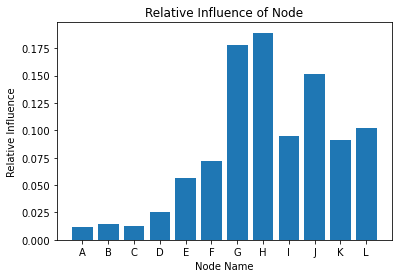

In [5]:
# Run page rank on network
result, iterations = PageRank(network, 1)

plt.title('Relative Influence of Node')
plt.xlabel('Node Name')
plt.ylabel('Relative Influence')
plt.bar(list(range(result.shape[0])), result, tick_label=list(mapping.keys()))

(result, iterations)